In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tidy3d as td

from Devices import SawfishSimulation

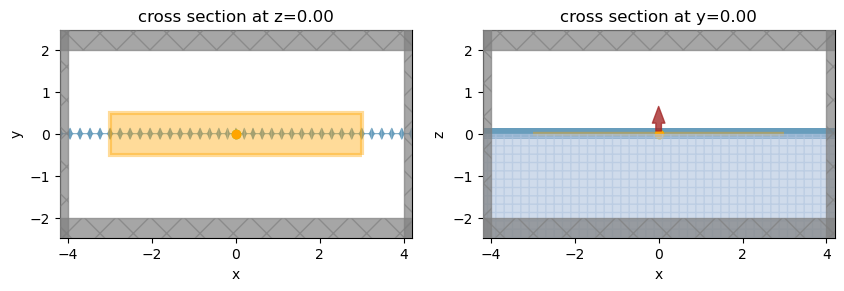

10:43:59 Eastern Standard Time Created task 'sawfish_simulation' with task_id   
                               'fdve-98c1adfb-53b0-4775-82f1-da5accdf0766' and  
                               task_type 'FDTD'.

                               View task using web UI at                        
                               ]8;id=297569;https://tidy3d.simulation.cloud/workbench?taskId=fdve-98c1adfb-53b0-4775-82f1-da5accdf0766\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=15213;https://tidy3d.simulation.cloud/workbench?taskId=fdve-98c1adfb-53b0-4775-82f1-da5accdf0766\taskId]8;;\
                               ]8;id=297569;https://tidy3d.simulation.cloud/workbench?taskId=fdve-98c1adfb-53b0-4775-82f1-da5accdf0766\=]8;;\]8;id=151606;https://tidy3d.simulation.cloud/workbench?taskId=fdve-98c1adfb-53b0-4775-82f1-da5accdf0766\fdve]8;;\]8;id=297569;https://tidy3d.simulation.cloud/workbench?taskId=fdve-98c1adfb-53b0-4775-82f1-da5accdf0766\-98c1adfb-53b0-4775-82f1-da5accdf0766']8;;\.

Output()

10:44:20 Eastern Standard Time status = queued

                               To cancel the simulation, use                    
                               'web.abort(task_id)' or 'web.delete(task_id)' or 
                               abort/delete the task in the web UI. Terminating 
                               the Python script will not stop the job running  
                               on the cloud.

Output()

10:44:29 Eastern Standard Time status = preprocess

10:44:34 Eastern Standard Time Maximum FlexCredit cost: 0.744. Use              
                               'web.real_cost(task_id)' to get the billed       
                               FlexCredit cost after a simulation run.

                               starting up solver

                               running solver

Output()

10:47:27 Eastern Standard Time early shutoff detected at 72%, exiting.

                               status = postprocess

Output()

10:47:32 Eastern Standard Time status = success

                               View simulation result at                        
                               ]8;id=601727;https://tidy3d.simulation.cloud/workbench?taskId=fdve-98c1adfb-53b0-4775-82f1-da5accdf0766\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=665378;https://tidy3d.simulation.cloud/workbench?taskId=fdve-98c1adfb-53b0-4775-82f1-da5accdf0766\taskId]8;;\
                               ]8;id=601727;https://tidy3d.simulation.cloud/workbench?taskId=fdve-98c1adfb-53b0-4775-82f1-da5accdf0766\=]8;;\]8;id=491112;https://tidy3d.simulation.cloud/workbench?taskId=fdve-98c1adfb-53b0-4775-82f1-da5accdf0766\fdve]8;;\]8;id=601727;https://tidy3d.simulation.cloud/workbench?taskId=fdve-98c1adfb-53b0-4775-82f1-da5accdf0766\-98c1adfb-53b0-4775-82f1-da5accdf0766']8;;\.

Output()

10:47:40 Eastern Standard Time loading simulation from simulation_data.hdf5

In [35]:
sawfish_design_params = {
    'num_unit_cells_left': 20,
    'num_unit_cells_right': 20,
    'width': 11e-3,
    'height': 130e-3,
    # 'taper_alattice': [0.2, 0.2, 0.2, 0.2]
    # 'taper_widths': [0.2, 0.207, 0.2179, 0.2284]
}

sawfish = SawfishSimulation(wavelength_in_at="650", **sawfish_design_params)

simulation_options = {
    'run_time': 15e-12,
    # 'FieldMonitorSize': [0, 0.5, 1],
    'mesh_grid_size': 15,
    'source_location': [0, 0, 0],
    'sim_size': [8, 4, 4],
    'FieldMonitorSize': [6, 1, 0],
    'symmetry': (0, 0, 1),
    'source_polarization': "Hz"
}

sawfish_sim = sawfish.make_simulation(**simulation_options)
# sawfish_sim.plot_3d()
sim_data = sawfish.run_simulation(sawfish_sim)

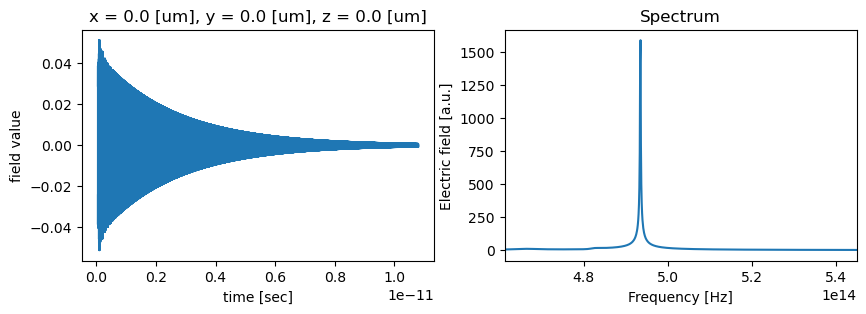

                     decay             Q  amplitude     phase         error
freq                                                                       
4.462188e+14  3.773869e+13     37.145907   0.001255 -0.521908  2.947224e-05
4.567282e+14  2.022508e+13     70.944301   0.000678  1.015161  1.932232e-05
4.663524e+14  1.883306e+13     77.793480   0.001196  2.626377  1.586793e-05
4.736728e+14  1.282698e+13    116.012249   0.001119 -1.993876  1.158191e-05
4.822680e+14  8.106929e+12    186.888231   0.000967 -0.206558  9.213531e-06
4.861222e+14  4.327095e+12    352.938380   0.000636  2.219329  4.658350e-06
4.935288e+14  3.910557e+11   3964.823304   0.000162 -0.952870  7.864173e-07
5.210676e+14  4.260423e+10  38422.993433   0.000002 -2.778250  4.110471e-06
Cavity Resonance at 607.45 nm; Q = 3965.0


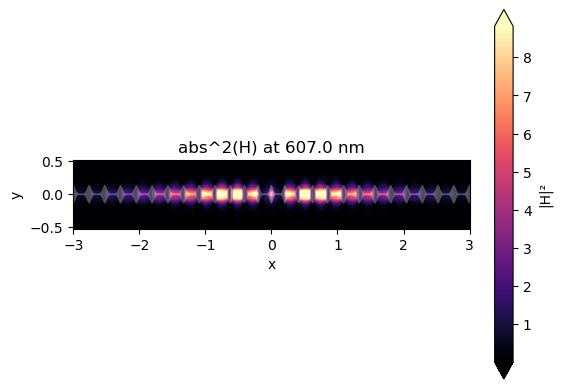

In [36]:
sawfish.analyze_FieldTimeMonitor(sim_data,
                                 freq_range=sawfish.freq_range,
                                 filter_resonances=False, 
                                 print_data_bool=True)
sawfish.analyze_FieldMonitor(sim_data, 
                             freq_range=sawfish.freq_range,
                             plot_field="H")

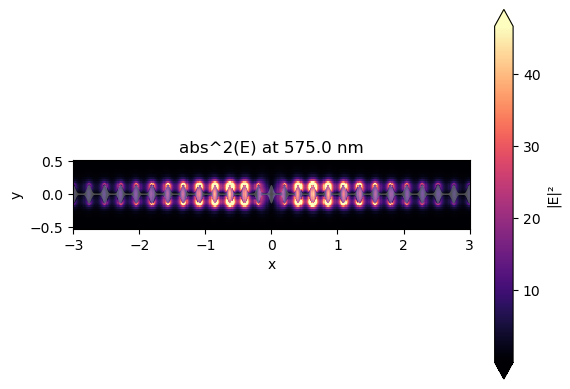

In [37]:
sawfish.analyze_FieldMonitor(sim_data, 
                             freq_range=sawfish.freq_range,
                             plot_field="E",
                             freq=5.210676e+14)

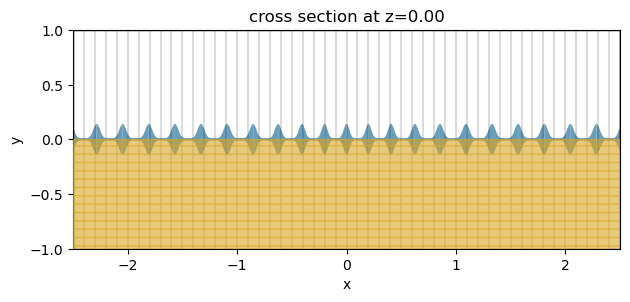

In [62]:
sawfish_design_params = {
    'num_unit_cells_left': 20,
    'num_unit_cells_right': 20,
    'width': 11e-3,
    'height': 130e-3,
    'taper_widths': [0.2, 0.207, 0.2179, 0.2284]
}

sawfish = SawfishSimulation(wavelength_in_at="650", **sawfish_design_params)

eme_num_modes = 50

eme_grid_spec = td.EMEUniformGrid(
    num_cells=50,
    mode_spec=td.EMEModeSpec(num_modes=eme_num_modes)
)

eme_field_mon = td.EMEFieldMonitor(
    name="field", 
    size=(td.inf, td.inf, 0),
    num_modes=10
)

eme_mode_mon = td.EMEModeSolverMonitor(
    name="modes", 
    size=(td.inf, td.inf, td.inf),
    center=(0, 0, 0),
    num_modes=15,
    eme_cell_interval_space=40
)

eme_coeff_mon = td.EMECoefficientMonitor(
    name="coeffs", 
    size=(td.inf, td.inf, td.inf),
)

eme_sim = td.EMESimulation(
    center=(0, 0, 0),
    size=(5, 2, 2),
    grid_spec=td.GridSpec.auto(min_steps_per_wvl=15, wavelength=0.63),
    structures=[sawfish.sawfish_structure],
    monitors=[eme_field_mon, eme_mode_mon, eme_coeff_mon],
    symmetry=(0, -1, 1),
    axis=0,
    freqs=[sawfish.freq0],
    eme_grid_spec=eme_grid_spec,
    # port_offsets=(pad_x, pad_x),
    store_port_modes=False,
)

eme_sim.plot(z=0, monitor_alpha=0)
plt.show()

In [63]:
eme_sim_data = td.web.run(eme_sim, task_name="sawfish")

15:40:13 Eastern Standard Time Created task 'sawfish' with task_id              
                               'eme-c195ef38-6f5e-45f8-bbf0-c840305bf3b9' and   
                               task_type 'EME'.

                               Tidy3D's EME solver is currently in the beta     
                               stage. Cost of EME simulations is subject to     
                               change in the future.

Output()

15:40:45 Eastern Standard Time status = queued

                               To cancel the simulation, use                    
                               'web.abort(task_id)' or 'web.delete(task_id)' or 
                               abort/delete the task in the web UI. Terminating 
                               the Python script will not stop the job running  
                               on the cloud.

Output()

15:40:48 Eastern Standard Time Maximum FlexCredit cost: 0.304. Use              
                               'web.real_cost(task_id)' to get the billed       
                               FlexCredit cost after a simulation run.

                               starting up solver

                               running solver

Output()

Output()

15:52:26 Eastern Standard Time status = success

Output()

15:52:34 Eastern Standard Time loading simulation from simulation_data.hdf5

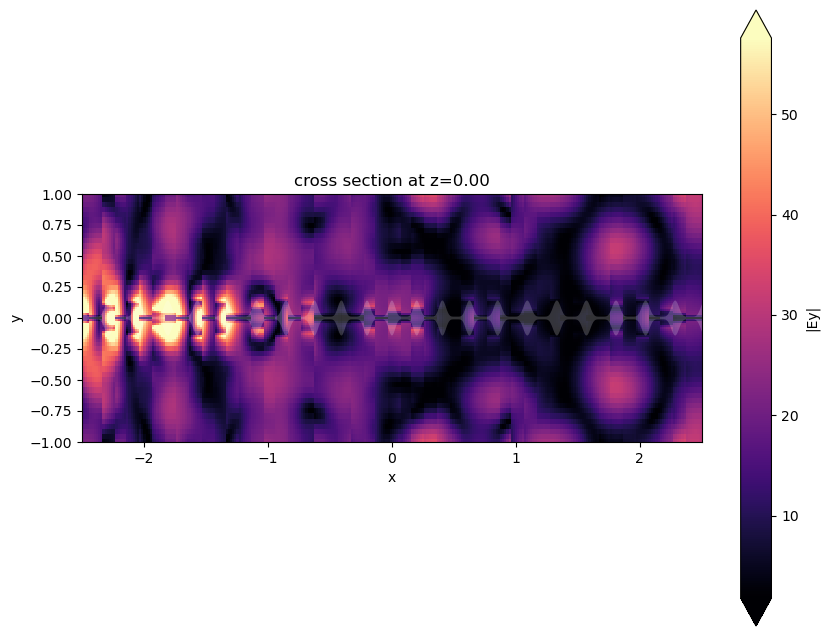

In [65]:
fig, ax = plt.subplots(figsize=(10, 8))
eme_sim_data.plot_field("field", "Ey", val="abs", eme_port_index=0, mode_index=0, ax=ax)
plt.show()